## HDBSCAN Clustering

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import hdbscan


from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from IPython.display  import display_html
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

`Loading data`

In [6]:
digits = load_digits()
data = digits.data

### Dimensionality reduction

We are using TSNE to reduce the 64 dimensions of our dataset to 2 in order to be able to visualize it.

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


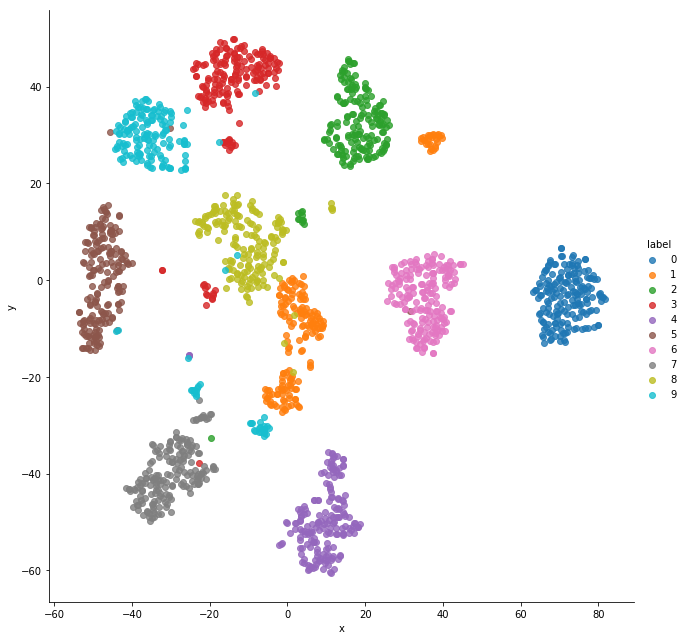

In [7]:
data_embedded = TSNE(n_components = 2, random_state=0).fit_transform(data)
df = pd.DataFrame(data_embedded, columns = ['x','y'])
df['label']= digits.target
sns.lmplot(x= 'x',y= 'y', data= df, fit_reg = False,size=9,hue='label')

In [8]:
fin_clusterer= hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1,prediction_data=True)
fin_clusterer.fit(digits.data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=40, min_samples=1, p=None,
    prediction_data=True)

### Visualizing the clustered data points with a Dendrogram

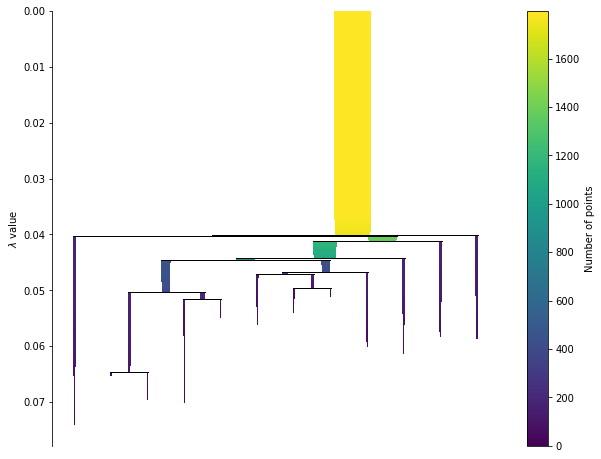

In [9]:
plt.figure(figsize=(10,8))
fin_clusterer.condensed_tree_.plot()

### The circled lines are the  selected clusters by HDBSCAN

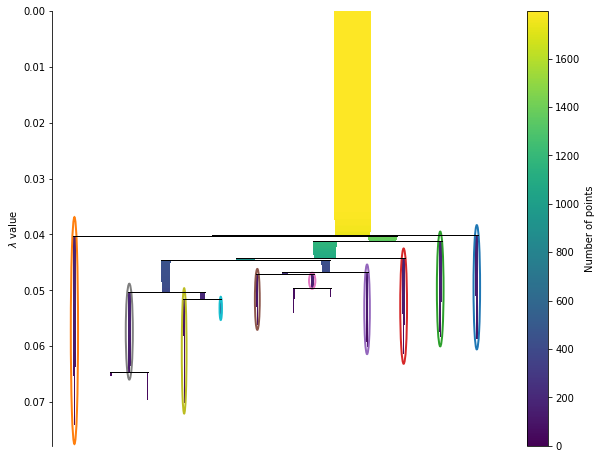

In [10]:
plt.figure(figsize=(10,8))
fin_clusterer.condensed_tree_.plot(select_clusters= True, selection_palette = sns.color_palette())

### Each cluster is assigned a label ( -1 being noise)

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


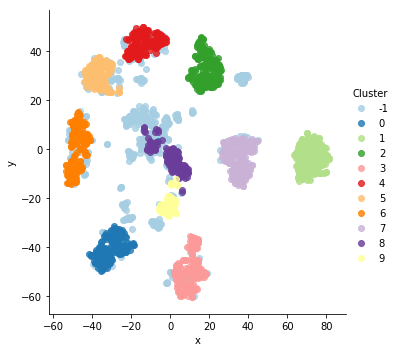

In [37]:
new_df =  pd.DataFrame(data_embedded, columns = ['x','y'])
new_df['Cluster']= fin_clusterer.labels_
color_palette = sns.color_palette('Paired', fin_clusterer.labels_.max()+2)
sns.lmplot(x= 'x',y= 'y', data= new_df, fit_reg = False,size=5,hue='Cluster', palette=color_palette)

Text(0, 0.5, 'frequency')

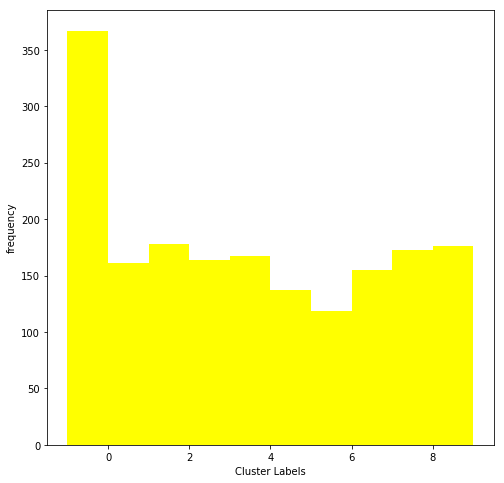

In [41]:
plt.figure(figsize=(8,8))
plt.hist(fin_clusterer.labels_, color = ['yellow']);
plt.xlabel('Cluster Labels')
plt.ylabel('frequency')

`Looking for the centriod of each cluster.`

In [12]:
def center_point(cluster_label):
    '''
    
    This function is to help find the centriod of a 
    cluster.
    
    Cluster_label is the number assignedf to the cluster
    not the target label.
    
    '''
    #mem_cluster= digits.data[np.argwhere(fin_clusterer.labels_==0).reshape(1, -1)[0]]
    #when using digits,data
    mem_cluster = digits.images[np.argwhere(fin_clusterer.labels_== cluster_label).reshape(1, -1)[0]]

    #centriod= np.zeros(64)
    centriod_ =np.zeros(shape=(8,8))
    for i in range(0,len(mem_cluster)):
        centriod_ += mem_cluster[i]
    return(centriod_/len(mem_cluster))
    

### Ploting each centriod points 

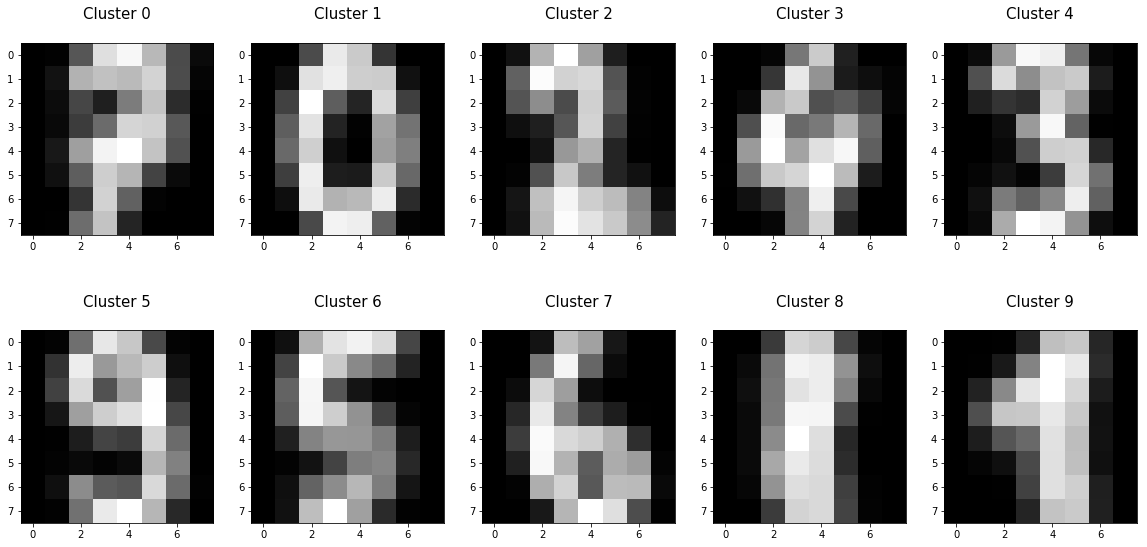

In [13]:
plt.figure(figsize = (20,15))
for j in range(0,fin_clusterer.labels_.max()+1):
    plt.subplot(3,5,j+1)
    plt.imshow(np.reshape(center_point(j), (8,8)),cmap=plt.cm.gray)
    plt.title('Cluster %i\n' % j, fontsize = 15)

`We may give the following label to each cluster. The only unidentifiable label is cluster 8.` 